In [18]:
from tsai.all import *
import sklearn.metrics as skm
import numpy as np
import pandas as pd


X, y = np.load("data/X_sum_all.npy"), np.load("data/y_sum_all.npy")
y_turn, y_lane, y_speed, y_hazard = y[:, 0], y[:, 1], y[:, 2], y[:, 3]

In [19]:
DATANUM = 900000
from collections import Counter

y_turn, y_lane, y_speed, y_hazard = y[:, 0], y[:, 1], y[:, 2], y[:, 3]

ct_turn, ct_lane, ct_speed, ct_hazard = Counter(y_turn), Counter(y_lane), Counter(y_speed), Counter(y_hazard)

print(ct_turn, "\n", ct_lane, "\n", ct_speed, "\n", ct_hazard)

for keys in ct_turn.keys():
    print(f"{keys}: {ct_turn[keys] / DATANUM:.4f}", end=" ")
print()

for keys in ct_lane.keys():
    print(f"{keys}: {ct_lane[keys] / DATANUM:.4f}", end=" ")
print()

for keys in ct_speed.keys():
    print(f"{keys}: {ct_speed[keys] / DATANUM:.4f}", end=" ")
print()

for keys in ct_hazard.keys():
    print(f"{keys}: {ct_hazard[keys] / DATANUM:.4f}", end=" ")
print()



Counter({'False': 848269, 'Right': 25795, 'Left': 24247, 'Reverse': 1689}) 
 Counter({'False': 900000}) 
 Counter({'False': 899281, 'Hbrk': 527, 'Acc': 192}) 
 Counter({'False': 896901, 'True': 3099})
False: 0.9425 Left: 0.0269 Right: 0.0287 Reverse: 0.0019 
False: 1.0000 
False: 0.9992 Hbrk: 0.0006 Acc: 0.0002 
False: 0.9966 True: 0.0034 


In [ ]:
learner_turn = load_learner_all(path="models/turn_20221226_0955", dls_fname='dls_turn', model_fname='model_turn_MLSTM_FCNPlus', learner_fname='learner_turn')
splits = get_splits(y_turn, valid_size=0.2, random_state=42)

# Turn

In [10]:
print(' '.join(f'{k}: {v}' for k, v in ct_turn.items()))

False: 848269 Left: 24247 Right: 25795 Reverse: 1689


In [27]:
def df_to_exc(test_targets, test_preds, classes):
    df = pd.DataFrame(columns=["targets", "preds", "Accuracy", "Recall", "Precision", "F1_Score"])

    for idx in range(len(test_targets)):
        target_class, pred_class = classes[int(test_targets[idx])], classes[int(test_preds[idx])]
        test_accuracy = round(skm.accuracy_score(test_targets[:idx], test_preds[:idx]), 4)
        test_precision = round(skm.precision_score(test_targets[:idx], test_preds[:idx], average = "micro"), 4)
        test_recall = round(skm.recall_score(test_targets[:idx], test_preds[:idx], average = "micro"), 4)
        test_f1 = round(skm.f1_score(test_targets[:idx], test_preds[:idx], average = "micro"), 4)
        
        print(f"{idx+1}: {target_class}, {pred_class},", end=" ")
        print(f"Accuracy: {test_accuracy}, Precision: {test_precision}, Recall: {test_recall}, F1_Score: {test_f1}")
        
        df.loc[idx+1] = [target_class, pred_class, test_accuracy, test_precision, test_recall, test_f1]

    skm.confusion_matrix(test_targets, test_preds)
    df.head()
    df.to_excel("turn.xlsx")
    df.to_csv("output/turn_result.csv", index=False)

df_to_exc(targets, preds, classes)

# turn

In [ ]:
# False: 0, Right: 1, Reverse: 2, Left: 3 -> 0: False, 1: Right, 2: Left, 3: Reverse
class_turn = {0: "False", 1: "Right", 2: "Left", 3: "Reverse"}

learner_turn = load_learner_all(path="models/turn_20221226_0955", dls_fname='dls_turn', model_fname='model_turn_MLSTM_FCNPlus', learner_fname='learner_turn')

dls_turn = learner_turn.dls
valid_dl_turn = dls_turn.valid
print(dls_turn.class_priors)

_, test_targets_turn, test_preds_turn = learner_turn.get_preds(dl=valid_dl_turn, with_decoded=True, save_preds=None, save_targs=None)

# False: 0, Right: 1, Reverse: 2, Left: 3 -> 0: False, 1: Right, 2: Left, 3: Reverse
test_targets_turn = test_targets_turn.tolist()
test_preds_turn = test_preds_turn.tolist()

for idx in range(len(test_targets_turn)):
    if test_targets_turn[idx] == 3:
        test_targets_turn[idx] = 2
    elif test_targets_turn[idx] == 2:
        test_targets_turn[idx] = 3

for idx in range(len(test_preds_turn)):
    if test_preds_turn[idx] == 3:
        test_preds_turn[idx] = 2
    elif test_preds_turn[idx] == 2:
        test_preds_turn[idx] = 3

# speed

In [14]:
# Acc: 0, False: 1, Hbrk: 2
class_speed = {0: "False", 1: "Acc", 2: "Hbrk"}

learner_speed = load_learner_all(path="models/speed_20221226_1202", dls_fname='dls_speed', model_fname='model_speed_MLSTM_FCNPlus', learner_fname='learner_speed')

dls_speed = learner_speed.dls
valid_dl_speed = dls_speed.valid
print(dls_speed.class_priors)

_, test_targets_speed, test_preds_speed = learner_speed.get_preds(dl=valid_dl_speed, with_decoded=True, save_preds=None, save_targs=None)

# in speed_targets, 0: Acc, 1: False, 2: Hbrk
# it'll be changed to 0: False, 1: Acc, 2: Hbrk
test_targets_speed = test_targets_speed.tolist()
test_preds_speed = test_preds_speed.tolist()

for idx in range(len(test_targets_speed)):
    if test_targets_speed[idx] == 0:
        test_targets_speed[idx] = 1
    elif test_targets_speed[idx] == 1:
        test_targets_speed[idx] = 0

for idx in range(len(test_preds_speed)):
    if test_preds_speed[idx] == 0:
        test_preds_speed[idx] = 1
    elif test_preds_speed[idx] == 1:
        test_preds_speed[idx] = 0

TensorCategory([2.1298e-04, 9.9920e-01, 5.8522e-04], device='cuda:0')


# compare Macro and Micro scores

In [21]:
# compare Macro and Micro scores
def compare_scores(test_targets, test_preds, classes):
    print("Macro Scores")
    print(skm.classification_report(test_targets, test_preds, target_names=classes, digits=4))
    print("Micro Scores")
    print(skm.classification_report(test_targets, test_preds, target_names=classes, digits=4, zero_division=0, output_dict=True)[""])
    
compare_scores(test_targets_turn, test_preds_turn, list(class_turn.values()))
compare_scores(test_targets_speed, test_preds_speed, list(class_speed.values()))

Macro Scores
              precision    recall  f1-score   support

       False     0.9970    0.9927    0.9949    169654
       Right     0.9180    0.9425    0.9301      4849
        Left     0.8581    0.9543    0.9036      5159
     Reverse     0.8592    0.9024    0.8802       338

    accuracy                         0.9901    180000
   macro avg     0.9081    0.9480    0.9272    180000
weighted avg     0.9906    0.9901    0.9903    180000

Micro Scores
              precision    recall  f1-score   support

       False     0.9970    0.9927    0.9949    169654
       Right     0.9180    0.9425    0.9301      4849
        Left     0.8581    0.9543    0.9036      5159
     Reverse     0.8592    0.9024    0.8802       338

    accuracy                         0.9901    180000
   macro avg     0.9081    0.9480    0.9272    180000
weighted avg     0.9906    0.9901    0.9903    180000

Macro Scores
              precision    recall  f1-score   support

       False     0.9997    1.0000   

# TP, FP, FN, TN

In [10]:
# calculate True Positive, False Positive, True Negative, False Negative of each class
def calculate_tp_fp_tn_fn(test_targets, test_preds, classes):
    tp, fp, tn, fn = [], [], [], []
    
    for idx in range(len(classes)):
        tp.append(0)
        fp.append(0)
        tn.append(0)
        fn.append(0)

    for idx in range(len(test_targets)):
        target_class, pred_class = int(test_targets[idx]), int(test_preds[idx])
        if target_class == pred_class:
            tp[target_class] += 1
        else:
            fp[pred_class] += 1
            fn[target_class] += 1

    for idx in range(len(classes)):
        tn[idx] = len(test_targets) - tp[idx] - fp[idx] - fn[idx]

    return tp, fp, tn, fn

calculate_tp_fp_tn_fn(test_targets_speed, test_preds_speed, class_speed)

([179850, 28, 51], [62, 1, 8], [82, 179960, 179887], [6, 11, 54])

# confusion matrix

In [36]:
speed_targets = test_targets
speed_preds = test_preds

In [37]:
# in speed_targets, 0: Acc, 1: False, 2: Hbrk
# it'll be changed to 0: False, 1: Acc, 2: Hbrk
speed_targets = speed_targets.tolist()
speed_preds = speed_preds.tolist()

for idx in range(len(speed_targets)):
    if speed_targets[idx] == 0:
        speed_targets[idx] = 1
    elif speed_targets[idx] == 1:
        speed_targets[idx] = 0

for idx in range(len(speed_preds)):
    if speed_preds[idx] == 0:
        speed_preds[idx] = 1
    elif speed_preds[idx] == 1:
        speed_preds[idx] = 0

In [49]:
print(skm.precision_score(speed_targets, speed_preds, average = "macro"),
skm.recall_score(speed_targets, speed_preds, average = "macro"),
skm.f1_score(speed_targets, speed_preds, average = "macro"))
skm.confusion_matrix(speed_targets, speed_preds)

0.9431931360394848 0.7345432145472177 0.8150972068603731


array([[179850,      0,      6],
       [     9,     28,      2],
       [    53,      1,     51]])

In [56]:
# make plot confusion matrix
from matplotlib import pyplot as plt

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    


In [ ]:
class_turn = {0: "False", 1: "Right", 2: "Reverse", 3: "Left"}
class_speed = {0: "Acc", 1: "False", 2: "Hbrk"}


# Compute confusion matrix
cnf_matrix = skm.confusion_matrix(speed_targets, speed_preds)
np.set_printoptions(precision=2)
plot_confusion_matrix(cnf_matrix, classes=class_speed.values(), normalize=True, title='Normalized confusion matrix')

In [69]:
from datetime import datetime

def write_txt_log(*args):
    with open(f"output/test_result.txt", "a") as f:
        current_time = datetime.now().strftime('%Y/%m/%d %H:%M:%S')
        for arg in args:
            f.writelines(f"[{current_time}] {arg}\n")

write_txt_log("test", "test2", "test3")

# hazard

In [74]:
class_hazard = {0: "False", 1: "True"}

learner_hazard = load_learner_all(path="models/hazard_20221226_1441", dls_fname='dls_hazard', model_fname='model_hazard_MLSTM_FCNPlus', learner_fname='learner_hazard')
dls_hazard = learner_hazard.dls
valid_dl_hazard = dls_hazard.valid
print(dls_hazard.class_priors)


_, test_targets_hazard, test_preds_hazard = learner_hazard.get_preds(dl=valid_dl_hazard, with_decoded=True, save_preds=None, save_targs=None)

TensorCategory([0.9966, 0.0034], device='cuda:0')


Confusion matrix, without normalization
[[179380      0]
 [   620      0]]


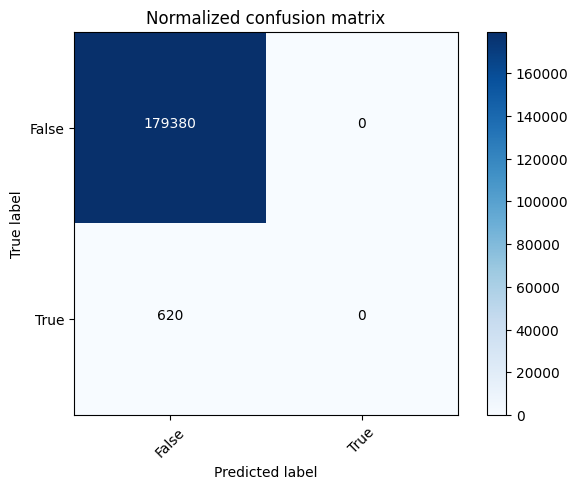

In [77]:
# Compute confusion matrix
cnf_matrix_hazard = skm.confusion_matrix(test_targets_hazard, test_preds_hazard)
plot_confusion_matrix(cnf_matrix_hazard, classes=class_hazard.values(), normalize=False, title='Normalized confusion matrix')

In [25]:
with open("/data/NIA50/50-1/output/result_speed_20221227_015914.txt", "r") as f:
    # read final line
    lines = f.readlines()
    print(lines[-1])
    # find index of the last line
print(lines[-1])
idx_start = lines[-1].find('[', 2) +1
print(idx_start)
idx_end = lines[-1].find(']', idx_start)
idx = int(lines[-1][idx_start:idx_end])
idx

[2022/12/27 09:40:28] [147923] target: False, pred: False, precision: 0.9996, recall: 0.9996, f1 score: 0.9996
[2022/12/27 09:40:28] [147923] target: False, pred: False, precision: 0.9996, recall: 0.9996, f1 score: 0.9996
23


147923

In [17]:
# read numbers and convert it to datetime
"_".join("output/result_turn_20221227_015913".split(".")[0].split("_")[-2:])

'20221227_015913'